In [1]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image, ImageEnhance ,ImageFilter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

In [2]:
import tensorflow as tf

2024-07-04 01:08:42.695645: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 01:08:42.720137: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Configurar TensorFlow para permitir el crecimiento de la memoria de la GPU
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2024-07-04 01:08:43.596908: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 01:08:43.622244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 01:08:43.622461: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
# Verificar dispositivos disponibles
if tf.test.gpu_device_name():
    print('GPU encontrada:', tf.test.gpu_device_name())
else:
    print("No se encontró GPU. Se utilizará la CPU.")

GPU encontrada: /device:GPU:0


2024-07-04 01:08:43.668917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 01:08:43.669060: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 01:08:43.669172: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
df_mini = pd.read_csv('../datos/grabacion/datos_bo3_minimapa_prueba.csv')
df_pov = pd.read_csv('../datos/grabacion/datos_bo3_pov_prueba.csv')

In [6]:
df_mini.head(10)

mini_01  \
0  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
1  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
2  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
3  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
4  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
5  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
6  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
7  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
8  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
9  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   

                                             mini_02  \
0  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
1  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
2  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
3  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
4  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
5  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
6  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
7  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
8  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
9  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   

                                             mini_03  \
0  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
1  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
2  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
3  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
4  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
5  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
6  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
7  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
8  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
9  datos/grabacion/mini_mapa/mini_mapa_29-18-02-3...   

                                             mini_04  \
0  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
1  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
2  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
3  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
4  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
5  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
6  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
7  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
8  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   
9  datos/grabacion/mini_mapa/mini_mapa_29-18-02-3...   

                                             mini_05 mouse_final  
0  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...    [27, -5]  
1  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...    [27, -5]  
2  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...      [0, 0]  
3  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...    [27, -5]  
4  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...      [0, 0]  
5  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   [-106, 4]  
6  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...    [27, -5]  
7  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...      [0, 0]  
8  datos/grabacion/mini_mapa/mini_mapa_29-18-02-2...   [-106, 4]  
9  datos/grabacion/mini_mapa/mini_mapa_29-18-02-3...    [171, 0]

In [7]:
df_pov.head(10)

pov_01  \
0  datos/grabacion/pov/pov_29-18-02-26-096257.jpg   
1  datos/grabacion/pov/pov_29-18-02-26-096257.jpg   
2  datos/grabacion/pov/pov_29-18-02-27-371299.jpg   
3  datos/grabacion/pov/pov_29-18-02-26-096257.jpg   
4  datos/grabacion/pov/pov_29-18-02-27-371299.jpg   
5  datos/grabacion/pov/pov_29-18-02-28-541824.jpg   
6  datos/grabacion/pov/pov_29-18-02-26-096257.jpg   
7  datos/grabacion/pov/pov_29-18-02-27-371299.jpg   
8  datos/grabacion/pov/pov_29-18-02-28-541824.jpg   
9  datos/grabacion/pov/pov_29-18-02-29-684082.jpg   

                                           pov_02  \
0  datos/grabacion/pov/pov_29-18-02-26-321979.jpg   
1  datos/grabacion/pov/pov_29-18-02-26-321979.jpg   
2  datos/grabacion/pov/pov_29-18-02-27-631116.jpg   
3  datos/grabacion/pov/pov_29-18-02-26-321979.jpg   
4  datos/grabacion/pov/pov_29-18-02-27-631116.jpg   
5  datos/grabacion/pov/pov_29-18-02-28-772586.jpg   
6  datos/grabacion/pov/pov_29-18-02-26-321979.jpg   
7  datos/grabacion/pov/pov_29-18-02-27-631116.jpg   
8  datos/grabacion/pov/pov_29-18-02-28-772586.jpg   
9  datos/grabacion/pov/pov_29-18-02-29-912598.jpg   

                                           pov_03  \
0  datos/grabacion/pov/pov_29-18-02-26-539160.jpg   
1  datos/grabacion/pov/pov_29-18-02-26-539160.jpg   
2  datos/grabacion/pov/pov_29-18-02-27-861158.jpg   
3  datos/grabacion/pov/pov_29-18-02-26-539160.jpg   
4  datos/grabacion/pov/pov_29-18-02-27-861158.jpg   
5  datos/grabacion/pov/pov_29-18-02-28-998902.jpg   
6  datos/grabacion/pov/pov_29-18-02-26-539160.jpg   
7  datos/grabacion/pov/pov_29-18-02-27-861158.jpg   
8  datos/grabacion/pov/pov_29-18-02-28-998902.jpg   
9  datos/grabacion/pov/pov_29-18-02-30-147756.jpg   

                                           pov_04  \
0  datos/grabacion/pov/pov_29-18-02-26-757697.jpg   
1  datos/grabacion/pov/pov_29-18-02-26-757697.jpg   
2  datos/grabacion/pov/pov_29-18-02-28-092721.jpg   
3  datos/grabacion/pov/pov_29-18-02-26-757697.jpg   
4  datos/grabacion/pov/pov_29-18-02-28-092721.jpg   
5  datos/grabacion/pov/pov_29-18-02-29-226355.jpg   
6  datos/grabacion/pov/pov_29-18-02-26-757697.jpg   
7  datos/grabacion/pov/pov_29-18-02-28-092721.jpg   
8  datos/grabacion/pov/pov_29-18-02-29-226355.jpg   
9  datos/grabacion/pov/pov_29-18-02-30-384932.jpg   

                                           pov_05 mouse_final  
0  datos/grabacion/pov/pov_29-18-02-26-982074.jpg    [27, -5]  
1  datos/grabacion/pov/pov_29-18-02-26-982074.jpg    [27, -5]  
2  datos/grabacion/pov/pov_29-18-02-28-313528.jpg      [0, 0]  
3  datos/grabacion/pov/pov_29-18-02-26-982074.jpg    [27, -5]  
4  datos/grabacion/pov/pov_29-18-02-28-313528.jpg      [0, 0]  
5  datos/grabacion/pov/pov_29-18-02-29-455969.jpg   [-106, 4]  
6  datos/grabacion/pov/pov_29-18-02-26-982074.jpg    [27, -5]  
7  datos/grabacion/pov/pov_29-18-02-28-313528.jpg      [0, 0]  
8  datos/grabacion/pov/pov_29-18-02-29-455969.jpg   [-106, 4]  
9  datos/grabacion/pov/pov_29-18-02-30-606285.jpg    [171, 0]

In [8]:
print(df_mini.shape)
print(df_pov.shape)

(27255, 6)
(27255, 6)


In [9]:
#Eliminamos duplicados
df_mini.drop_duplicates(inplace=True)
df_pov.drop_duplicates(inplace=True)

In [10]:
print(df_mini.shape)
print(df_pov.shape)

(232, 6)
(232, 6)


In [11]:
import ast
# Convertir la columna de tipo object a listas de enteros
df_mini['mouse_final'] = df_mini['mouse_final'].apply(ast.literal_eval)
df_pov['mouse_final'] = df_pov['mouse_final'].apply(ast.literal_eval)

In [12]:
# Modificar el valor de la segunda posición en cada array de la columna 'mouse_final' a 0
df_mini['mouse_final'] = df_mini['mouse_final'].apply(lambda x: [x[0], 0])
df_pov['mouse_final'] = df_pov['mouse_final'].apply(lambda x: [x[0], 0])

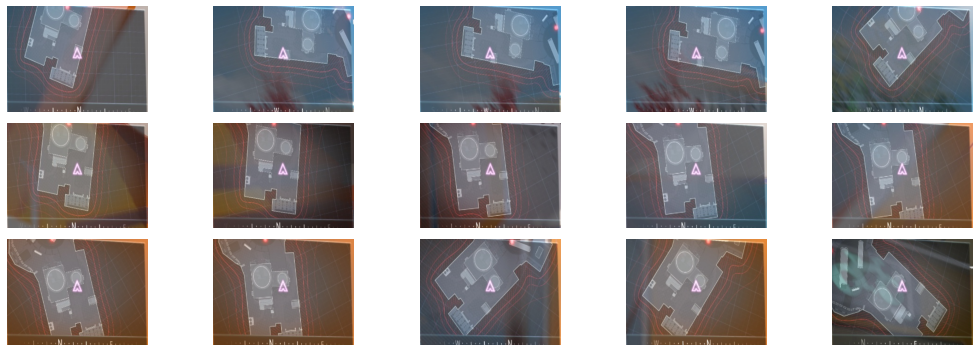

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_mini.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

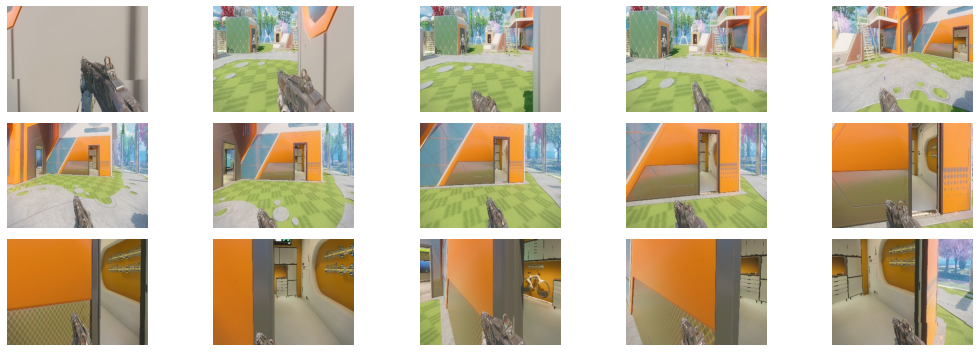

In [14]:
fig, axes = plt.subplots(3, 5, figsize=(15, 5))

for i in range(3): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = df_pov.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

Tamaño imagen -> (300, 225)
Tamaño matriz -> (225, 300, 3)


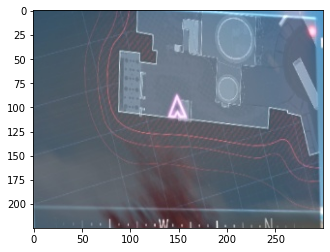

In [15]:
primera_fila = df_mini.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

Tamaño imagen -> (300, 225)
Tamaño matriz -> (225, 300, 3)


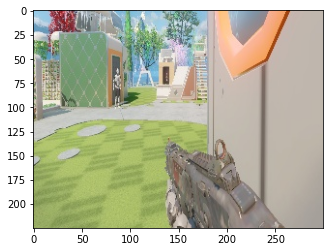

In [16]:
primera_fila = df_pov.iloc[0]
imagen = Image.open("../" +str(primera_fila.iloc[1]))
matriz_np = np.array(imagen)  
print("Tamaño imagen -> "+str(imagen.size))
print("Tamaño matriz -> "+ str(matriz_np.shape))
plt.imshow(matriz_np)
plt.axis('on')
plt.show()

# Funcion Del Batch

In [17]:
from keras.utils import Sequence

class ImageDataGenerator(Sequence):
    def __init__(self, df , sequence_length ,image_height , image_width , batch_size, filtro, **kwargs):
        self.df = df
        self.image_sequence_length = sequence_length
        self.image_height = image_height
        self.image_width = image_width
        self.batch_size = batch_size
        self.filtro_SHARPEN = filtro
        super().__init__(**kwargs)  # Llamada al constructor de la clase base
        
    def __len__(self):
        return int(np.ceil(len(self.df) / float(self.batch_size)))
    
    def cargar_todo(self,fin_df):
        batch_df = self.df.iloc[0:fin_df]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array(batch_df['mouse_final'].tolist())
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = Image.fromarray(np.array(imagen)).filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch
    
    def __getitem__(self, index):
        inicio_lote = index * self.batch_size
        final_lote = (index + 1) * self.batch_size
        
        batch_df = self.df.iloc[inicio_lote:final_lote]     #Obtenemos un lote del df
        
        X_batch = np.zeros((len(batch_df), self.image_sequence_length ,self.image_height, self.image_width, 3))  # Inicializar matriz para las imágenes
        y_batch = np.array(batch_df['mouse_final'].tolist())
        
        for i, (_, row) in enumerate(batch_df.iterrows()):
            frames = []
            for j in range(self.image_sequence_length):
                imagen = Image.open("../" + row.iloc[j])    # Obtener la ruta de la imagen
                imagen = Image.fromarray(np.array(imagen))
                
                if self.filtro_SHARPEN == True :
                    imagen = imagen.filter(ImageFilter.SHARPEN)  #Aplicamos Filtro SHARPEN
                    
                imagen = np.array(imagen) / 255.0           # Normalizar la imagen

                frames.append(imagen)                  #Juntamos frames en lista
            video = np.stack(frames, axis=0)           # Convertir lista de frames en un video np
            X_batch[i] = video
        
        return X_batch, y_batch

def comprobar_contenido(X_train , Y_train , num_video):

    fig, axs = plt.subplots(1, 5, figsize=(5 * 2, 1 * 2))

    for i in range(5):
        axs[i].imshow(X_train[num_video][i])
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()
    print("Etiqueta -> "+ str(Y_train[num_video]))
    return Y_train[num_video]

In [18]:
class CombinedDataGenerator(Sequence):
    def __init__(self, generator_mapa, generator_pov):
        self.generator_mapa = generator_mapa
        self.generator_pov = generator_pov

    def __len__(self):
        return min(len(self.generator_mapa), len(self.generator_pov))

    def __getitem__(self, index):
        X_mapa, y_mapa = self.generator_mapa[index]
        X_pov, y_pov = self.generator_pov[index]
        
        # Asegurarse de que las etiquetas sean iguales
        assert np.array_equal(y_mapa, y_pov), "Las etiquetas no coinciden"

            # Pasamos los batch como lista de arrays de np
        return [X_mapa, X_pov], y_mapa  # o y_pov, ya que son iguales


    def __iter__(self):
        # Devolver un iterador que itera sobre los batches
        for i in range(len(self)):
            yield self[i]

    def on_epoch_end(self):
        self.generator_mapa.on_epoch_end()
        self.generator_pov.on_epoch_end()

# PREPARACIÒN ENTRENAMIENTO

## Train Split

In [19]:
# Modelo Mini-Mapa
X_train_Mapa, X_test_Mapa = train_test_split(df_mini, test_size=0.2, random_state=42)
X_train_Mapa, X_valid_Mapa = train_test_split(X_train_Mapa, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_mini))
print("Tamaño del conjunto de entrenamiento:", len(X_train_Mapa))
print("Tamaño del conjunto de prueba:", len(X_test_Mapa))
print("Tamaño del conjunto de validación:", len(X_valid_Mapa))

Tamaño total:  232
Tamaño del conjunto de entrenamiento: 138
Tamaño del conjunto de prueba: 47
Tamaño del conjunto de validación: 47


In [20]:
# Modelo POV
X_train_Pov, X_test_Pov = train_test_split(df_pov, test_size=0.2, random_state=42)
X_train_Pov, X_valid_Pov = train_test_split(X_train_Pov, test_size=0.25, random_state=42)

print("Tamaño total: ",len(df_pov))
print("Tamaño del conjunto de entrenamiento:", len(X_train_Pov))
print("Tamaño del conjunto de prueba:", len(X_test_Pov))
print("Tamaño del conjunto de validación:", len(X_valid_Pov))

Tamaño total:  232
Tamaño del conjunto de entrenamiento: 138
Tamaño del conjunto de prueba: 47
Tamaño del conjunto de validación: 47


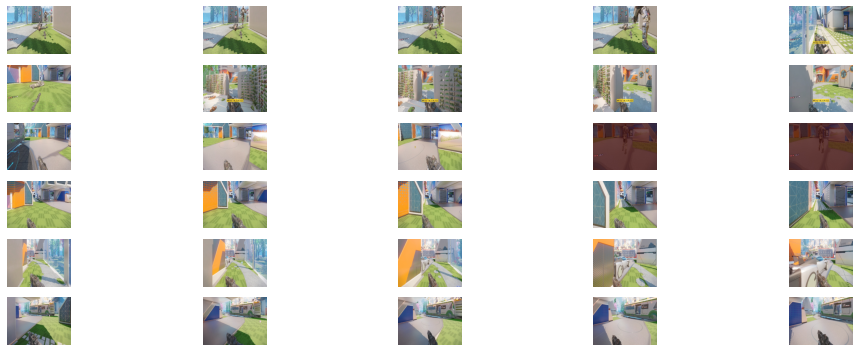

In [21]:
fig, axes = plt.subplots(6, 5, figsize=(15, 5))

for i in range(6): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = X_test_Pov.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

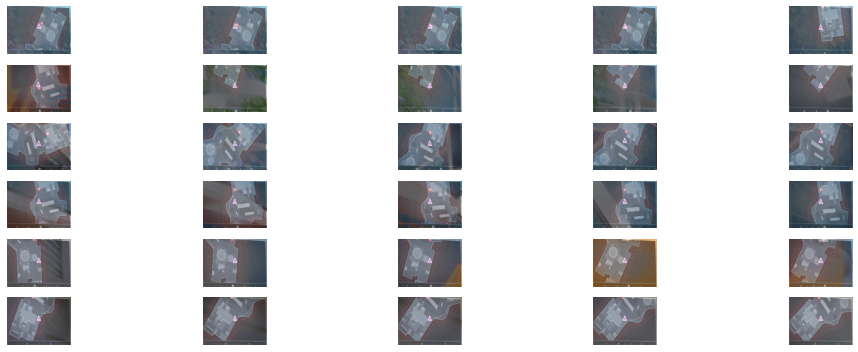

In [22]:
fig, axes = plt.subplots(6, 5, figsize=(15, 5))

for i in range(6): 
    for j in range(5):
        # Obtener la ruta de la imagen
        ruta_imagen = X_test_Mapa.iloc[i, j]  # Elimina los corchetes
        
        # Abrir la imagen y convertirla a matriz numpy
        imagen = Image.open("../" + ruta_imagen)
        matriz_np = np.array(imagen)
        
        # Mostrar la imagen en el subplot correspondiente
        axes[i, j].imshow(matriz_np)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

# Generadores

In [23]:
# Generador Mapa

altura_img_mini = 225
anchura_img_mini = 300
batch_size = 3 #videos por batch

# Generadores de Batches Mini-Mapa
train_generator_Mapa = ImageDataGenerator(X_train_Mapa, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,filtro =True)
test_generator_Mapa = ImageDataGenerator(X_test_Mapa, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,filtro =True)
valid_generator_Mapa = ImageDataGenerator(X_valid_Mapa, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,filtro =True)

46


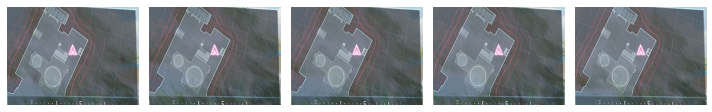

Etiqueta -> [0 0]


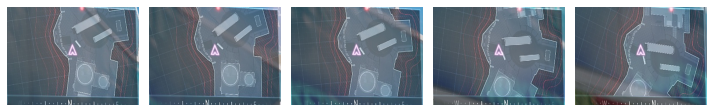

Etiqueta -> [-77   0]


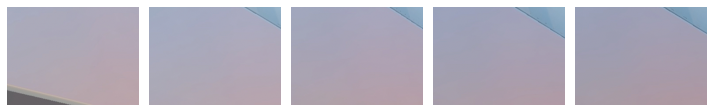

Etiqueta -> [0 0]


In [24]:
#Cantidad de batches en los que se divide el df
print(train_generator_Mapa.__len__())

#Comprobamos funcionamiento bach
X_batch, y_batch = train_generator_Mapa.__getitem__(2)

for i in range(0,batch_size):  # 4 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(X_batch , y_batch,i)

In [25]:
# Generador Pov
altura_img_mini = 225
anchura_img_mini = 300
batch_size = 3 #videos por batch

# Generadores de Batches Pov
train_generator_Pov = ImageDataGenerator(X_train_Pov, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,filtro =True)
test_generator_Pov = ImageDataGenerator(X_test_Pov, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,filtro =True)
valid_generator_Pov = ImageDataGenerator(X_valid_Pov, sequence_length=5, image_height=altura_img_mini, image_width=anchura_img_mini, batch_size=batch_size ,filtro =True)

46


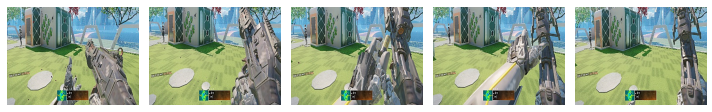

Etiqueta -> [0 0]


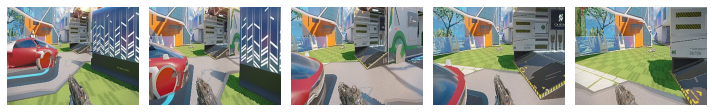

Etiqueta -> [-77   0]


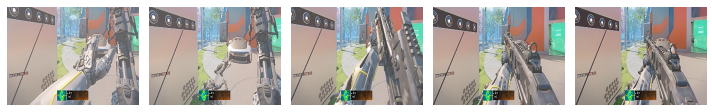

Etiqueta -> [0 0]


In [26]:
#Cantidad de batches en los que se divide el df
print(train_generator_Pov.__len__())

#Comprobamos funcionamiento bach
X_batch, y_batch = train_generator_Pov.__getitem__(2)

for i in range(0,batch_size):  # 2 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(X_batch , y_batch,i)

# Modelo - Entreno

In [27]:
from tensorflow.keras.models import Model ,Sequential
from tensorflow.keras.layers import Input, TimeDistributed, MaxPooling2D, Flatten, Dense ,ConvLSTM2D, Dropout,Concatenate ,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import MeanAbsoluteError

In [29]:
def creacion_modelo_convLSTM(input_shape_mapa , input_shape_pov):

    #Entrada input videos
    input_shape_mapa = tf.keras.Input(shape=input_shape_mapa) 
    input_shape_pov = tf.keras.Input(shape=input_shape_pov) 

    # ----------------------- MAPA ----------------------- 

    #Capa01 Mapa
    conv_mapa_01 = ConvLSTM2D(filters= 15, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(input_shape_mapa)
    batch_mapa_01 = TimeDistributed(BatchNormalization())(conv_mapa_01)
    conv_mapa_02 = ConvLSTM2D(filters= 15, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_mapa_01)
    max_pool_mapa = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_mapa_02)
    dropout_mapa = TimeDistributed(Dropout(0.5))(max_pool_mapa)

    #Capa02 Mapa
    conv_mapa_03 = ConvLSTM2D(filters= 32, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(dropout_mapa)
    batch_mapa_02 = TimeDistributed(BatchNormalization())(conv_mapa_03)
    conv_mapa_04 = ConvLSTM2D(filters= 32, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_mapa_02)
    max_pool_mapa_02 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_mapa_04)
    dropout_mapa_02 = TimeDistributed(Dropout(0.5))(max_pool_mapa_02)
    
    #Capa03 Mapa
    conv_mapa_05 = ConvLSTM2D(filters= 64, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(dropout_mapa_02)
    batch_mapa_03 = TimeDistributed(BatchNormalization())(conv_mapa_05)
    conv_mapa_06 = ConvLSTM2D(filters= 64, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_mapa_03)
    max_pool_mapa_03 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_mapa_06)
    dropout_mapa_03 = TimeDistributed(Dropout(0.5))(max_pool_mapa_03)
    
    #Capa04 Mapa
    conv_mapa_07 = ConvLSTM2D(filters= 128, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(dropout_mapa_03)
    batch_mapa_04 = TimeDistributed(BatchNormalization())(conv_mapa_07)
    conv_mapa_08 = ConvLSTM2D(filters= 128, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_mapa_04)
    max_pool_mapa_04 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_mapa_08)
    dropout_mapa_04 = TimeDistributed(Dropout(0.5))(max_pool_mapa_04)

    # ----------------------- POV ----------------------- 
    #Capa01 Pov
    conv_pov_01 = ConvLSTM2D(filters= 15, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(input_shape_pov)
    batch_pov_01 = TimeDistributed(BatchNormalization())(conv_pov_01)
    conv_pov_02 = ConvLSTM2D(filters= 15, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_pov_01)
    max_pool_pov = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_pov_02)
    dropout_pov = TimeDistributed(Dropout(0.5))(max_pool_pov)

    #Capa02 Pov
    conv_pov_03 = ConvLSTM2D(filters= 32, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(dropout_pov)
    batch_pov_02 = TimeDistributed(BatchNormalization())(conv_pov_03)
    conv_pov_04 = ConvLSTM2D(filters= 32, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_pov_02)
    max_pool_pov02 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_pov_04)
    dropout_pov_02 = TimeDistributed(Dropout(0.5))(max_pool_pov02)

    #Capa03 Pov
    conv_pov_05 = ConvLSTM2D(filters= 64, kernel_size=(4,4), 
                                    activation='relu', 
                                    padding='same',
                                    return_sequences=True)(dropout_pov_02)
    batch_pov_03 = TimeDistributed(BatchNormalization())(conv_pov_05)
    conv_pov_06 = ConvLSTM2D(filters= 64, kernel_size=(4,4), 
                                activation='relu', 
                                padding='same',
                                return_sequences=True)(batch_pov_03)
    max_pool_pov03 = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(conv_pov_06)
    dropout_pov_03 = TimeDistributed(Dropout(0.5))(max_pool_pov03)
    # ----------------------- DENSE -----------------------

    # Aplanar las salidas de ConvLSTM2D
    flat1 = Flatten()(dropout_mapa_04)
    flat2 = Flatten()(dropout_pov_03)
    
    # Concatenar las características aplanadas
    merged_features = Concatenate()([flat1, flat2])
    
    # Capa densa
    dense_out = Dense(118, activation='relu')(merged_features)
    drop_dense = Dropout((0.5))(dense_out)
    
    dense_out_02 = Dense(84, activation='relu')(drop_dense)
    drop_dense_02 = Dropout((0.5))(dense_out_02)
    
    #Capa Salida
    output = Dense(2, activation='linear')(drop_dense_02)

    return input_shape_mapa ,input_shape_pov, output

In [30]:
timesteps = 5
height = 225
width = 300
channels = 3
input_shape_mapa = (timesteps, height, width, channels) # Modelo Mini-Mapa
input_shape_pov = (timesteps, height, width, channels) # Modelo Pov

input_shape_mapa, input_shape_pov,output = creacion_modelo_convLSTM(input_shape_mapa,input_shape_pov)

2024-07-04 01:08:57.170354: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 01:08:57.170583: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-04 01:08:57.170746: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [31]:
# Definir y compilar el modelo
model = Model(inputs=[input_shape_mapa, input_shape_pov], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[MeanAbsoluteError()])
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
early_stopping = EarlyStopping(monitor= 'val_mean_absolute_error', patience=5, verbose=1, restore_best_weights=True)

In [32]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 225, 300, 3)]     0         []                            
                                                                                                  
 conv_lstm2d (ConvLSTM2D)    (None, 5, 225, 300, 15)      17340     ['input_1[0][0]']             
                                                                                                  
 time_distributed (TimeDist  (None, 5, 225, 300, 15)      60        ['conv_lstm2d[0][0]']         
 ributed)                                                                                         
                                                                                                  
 conv_lstm2d_1 (ConvLSTM2D)  (None, 5, 225, 300, 15)      28860     ['time_distributed[0][0]']

In [33]:
# Crear una instancia del generador combinado
combined_generator = CombinedDataGenerator(train_generator_Mapa, train_generator_Pov)
# Crear una instancia del generador combinado
valid_combine_generator = CombinedDataGenerator(valid_generator_Mapa, valid_generator_Pov)

In [34]:
imagenes , label = combined_generator.__getitem__(0)

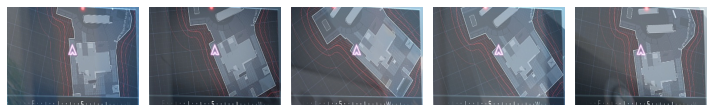

Etiqueta -> [-10   0]


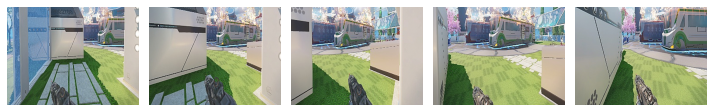

Etiqueta -> [-10   0]


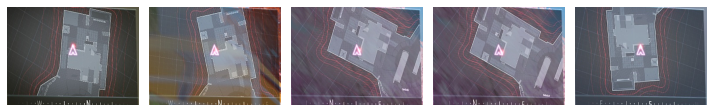

Etiqueta -> [16  0]


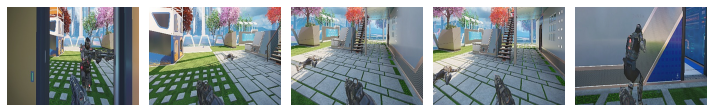

Etiqueta -> [16  0]


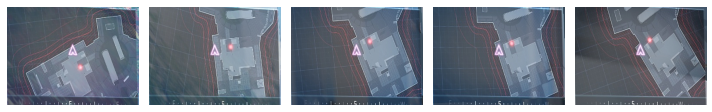

Etiqueta -> [-231    0]


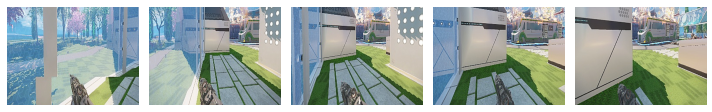

Etiqueta -> [-231    0]


In [35]:
for i in range(0,batch_size):  # 2 es el maximo de conjunto de imagenes del batch creado
    # Seleccionamos ver la posicion numero 0 del batch creado
    comprobar_contenido(imagenes[0] , label,i)
    comprobar_contenido(imagenes[1] , label,i)

In [36]:
import time

# Registro del tiempo de inicio
start_time = time.time()

# Entrenamiento Mini-Mapa
history = model.fit(combined_generator, epochs=1000, validation_data=valid_combine_generator, callbacks=[early_stopping])

model.save('modelo_merge.h5')

# Registro del tiempo de finalización
end_time = time.time()

Epoch 1/1000


2024-07-04 01:09:28.281618: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-07-04 01:09:29.515529: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7554dc0053a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-04 01:09:29.515549: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1070, Compute Capability 6.1
2024-07-04 01:09:29.518381: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-04 01:09:29.588589: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


46/46 [==============================] - 106s 2s/step - loss: 7236.9395 - mean_absolute_error: 26.9505 - val_loss: 14615.2070 - val_mean_absolute_error: 32.3587
Epoch 2/1000
46/46 [==============================] - 88s 2s/step - loss: 7215.3784 - mean_absolute_error: 26.3940 - val_loss: 14616.0430 - val_mean_absolute_error: 32.3664
Epoch 3/1000
46/46 [==============================] - 89s 2s/step - loss: 7215.0879 - mean_absolute_error: 26.3904 - val_loss: 14615.9473 - val_mean_absolute_error: 32.3658
Epoch 4/1000
46/46 [==============================] - 87s 2s/step - loss: 7214.9819 - mean_absolute_error: 26.3916 - val_loss: 14616.1182 - val_mean_absolute_error: 32.3644
Epoch 5/1000
46/46 [==============================] - 87s 2s/step - loss: 7214.8530 - mean_absolute_error: 26.3876 - val_loss: 14616.0000 - val_mean_absolute_error: 32.3595
Epoch 6/1000
46/46 [==============================] - 87s 2s/step - loss: 7214.7983 - mean_absolute_error: 26.3877 - val_loss: 14616.3115 - val_mea

/usr/lib/python3/dist-packages/keras/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


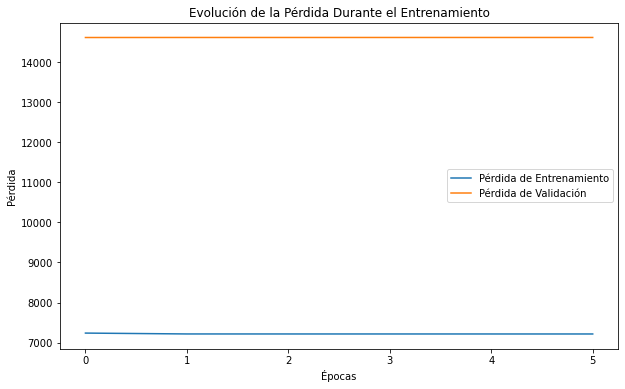

In [37]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar la pérdida de entrenamiento
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')

# Graficar la pérdida de validación
plt.plot(history.history['val_loss'], label='Pérdida de Validación')

# Añadir títulos y etiquetas
plt.title('Evolución de la Pérdida Durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar el gráfico
plt.show()

In [38]:
# Calcula la diferencia de tiempo en segundos
training_time_seconds = end_time - start_time

# Convierte el tiempo de entrenamiento a horas
training_time_hours = training_time_seconds / 3600  # 3600 segundos en una hora

# Imprime el tiempo de entrenamiento en horas
print(f"El entrenamiento duró aproximadamente {training_time_hours:.2f} horas.")

El entrenamiento duró aproximadamente 0.15 horas.


In [39]:
# Crear una instancia del generador combinado
test_generator = CombinedDataGenerator(test_generator_Mapa, test_generator_Pov)

In [40]:
resultado = model.evaluate(test_generator)

16/16 [==============================] - 8s 498ms/step - loss: 8746.5488 - mean_absolute_error: 28.1991


In [41]:
resultado

[8746.548828125, 28.199111938476562]

# Pruebas

## Densa 84
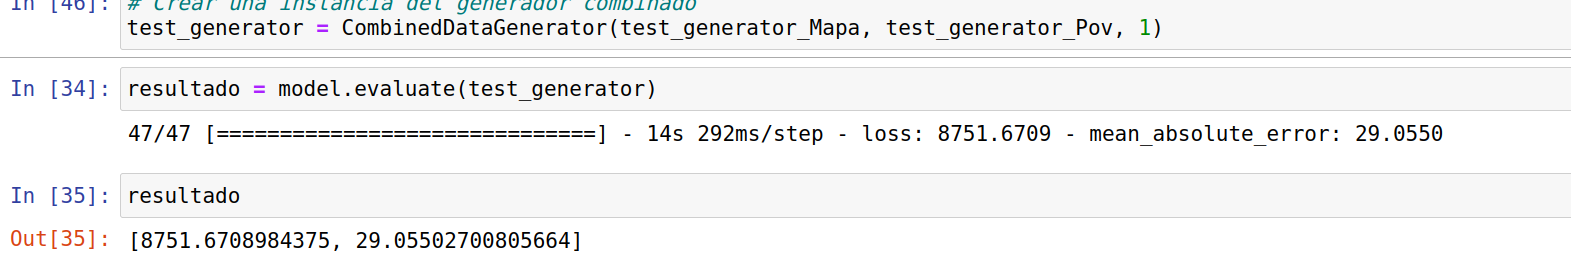

## Densa 94
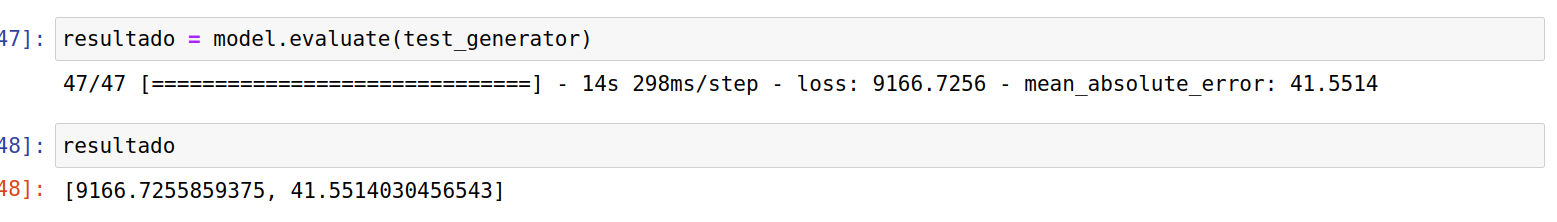

##  Densa 100
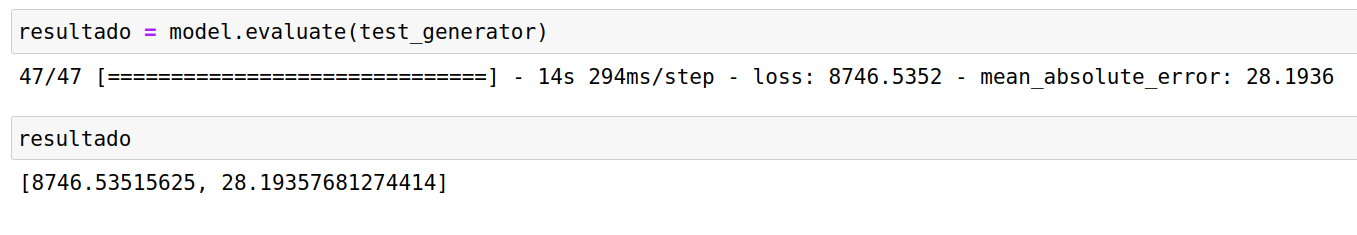

## Añadiendo segunda capa de 64
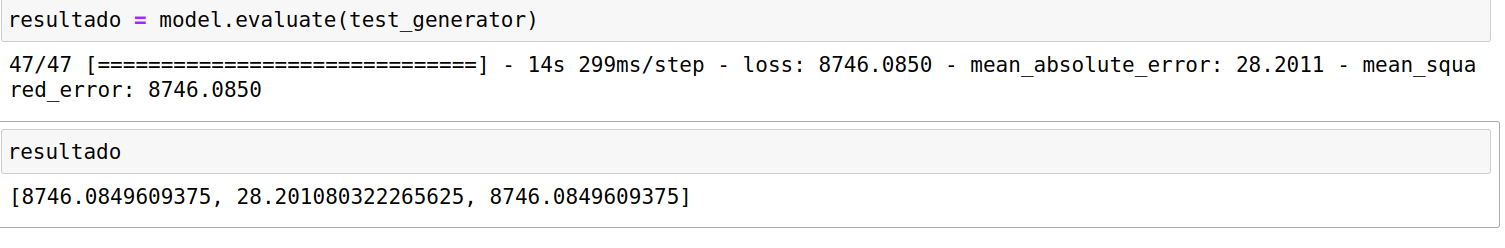

## Añadiendo segunda capa de 84
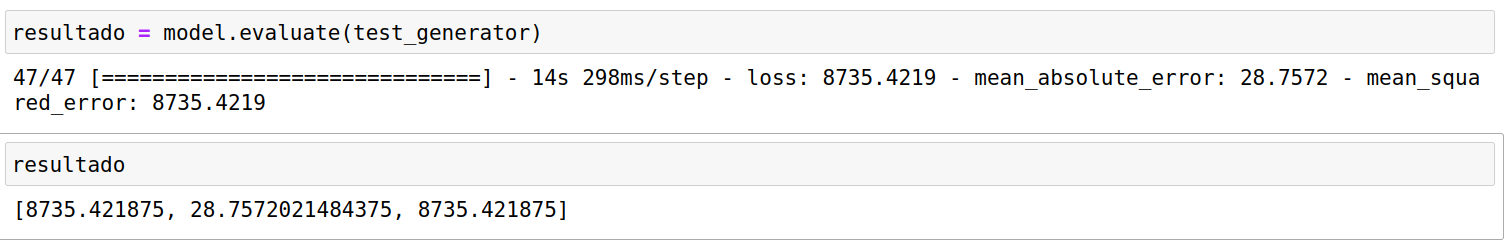

## Añadiendo segunda capa de 94
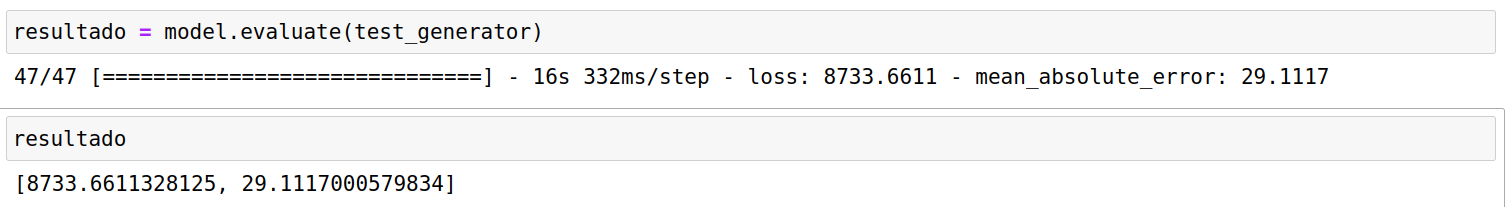

## Capa tercera capa de 248

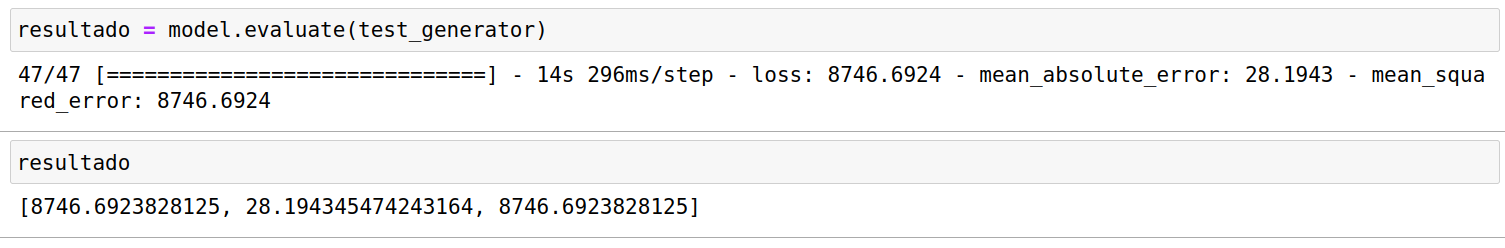

## Capa tercera capa de 124
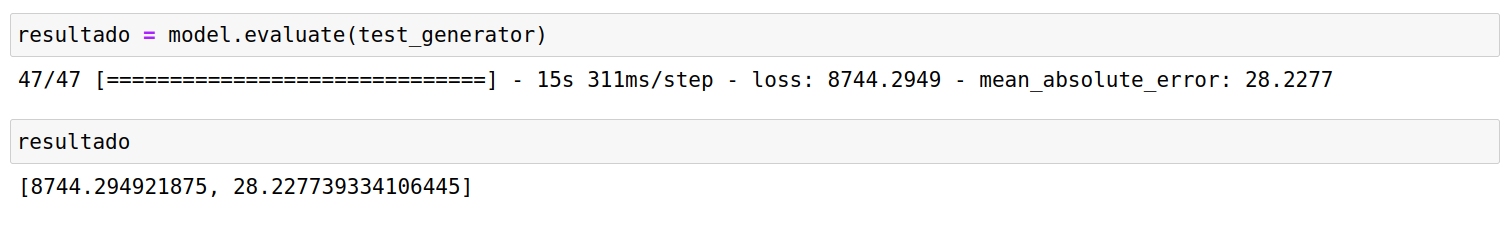

## Capa tercera capa de 94

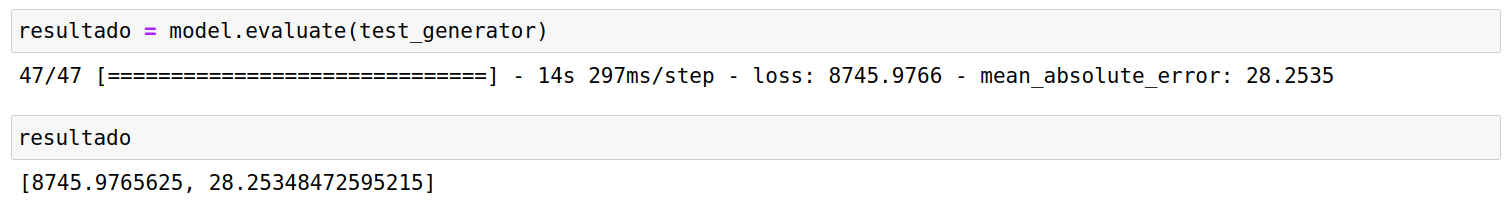

## Convo de 245

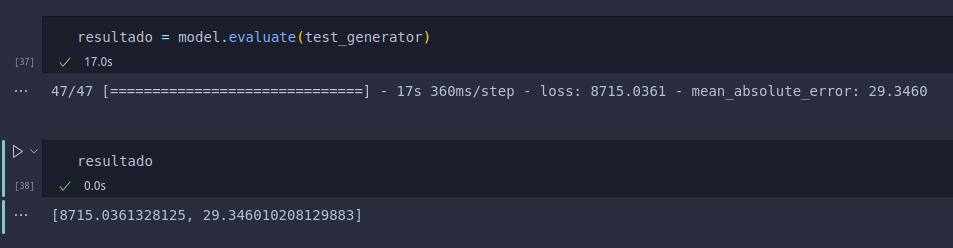

## Final 
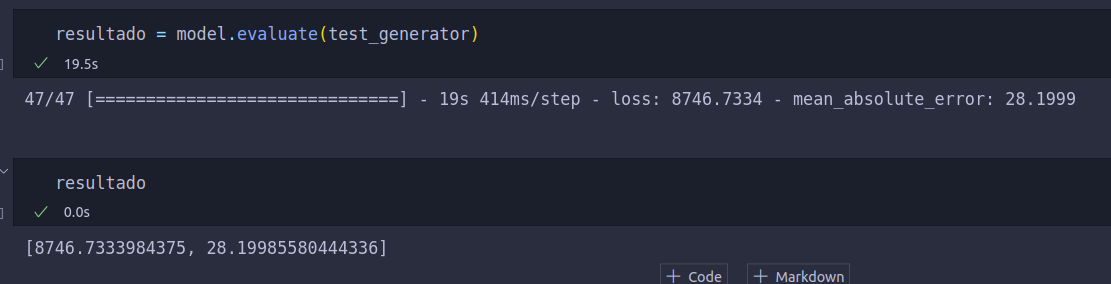

## BAJAR CONVOLUCIONALES A LA MITAD Y BATCH DE 3

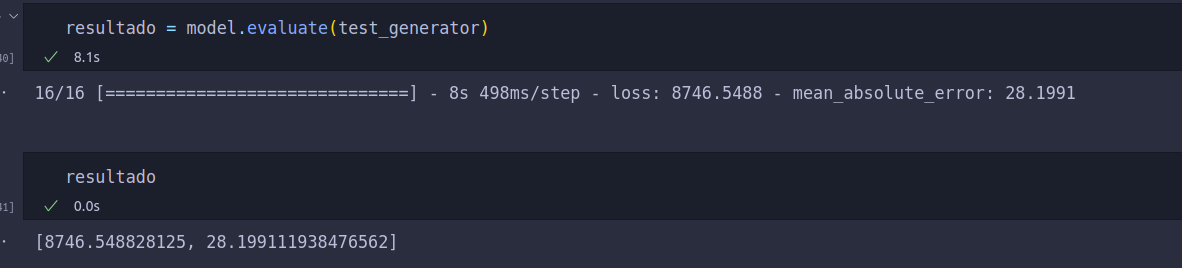